In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import movie metadata

In [2]:
tsv_file_path = 'data/movie.metadata.tsv'

# Define the column names based on the metadata structure.
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres",
]

# Read the TSV file into a pandas DataFrame and specify that it's tab-separated.
df = pd.read_csv(tsv_file_path, sep='\t', names=column_names, header=None)

# To display the DataFrame:
df


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Extract languages, countries, genres, release year

In [3]:
# Function to extract the language names
def extract_language(language_data):
    language_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, language_data)
    for match in matches:
        language_names.append(match[1].split(' ')[0])  # Extract the language name
    return ','.join(language_names)

# Apply the function to extract language names
df["Movie languages"] = df["Movie languages"].apply(extract_language)


In [4]:
# Function to extract the countries names
def extract_countries(country_data):
    country_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, country_data)
    for match in matches:
        country_names.append(match[1])  # Extract the country name
    return ','.join(country_names)

# Apply the function to extract country names
df["Movie countries"] = df["Movie countries"].apply(extract_countries)


In [5]:
# Function to extract the genres
def extract_genres(genre_data):
    genre_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, genre_data)
    for match in matches:
        genre_names.append(match[1])  # Extract the genre name
    return ','.join(genre_names)

# Apply the function to extract genre names
df["Movie genres"] = df["Movie genres"].apply(extract_genres)

# Convert 'genres'column from comma-separated strings to lists
df['Movie genres'] = df['Movie genres'].apply(lambda x: x.split(','))

# Function to extract the first element of the list
def extract_first_element(genre_list):
    return genre_list[0] if genre_list else None

# Apply the function to the "Movie genres" column
df['Movie genres'] = df['Movie genres'].apply(lambda x: extract_first_element(x))




In [6]:
# Function to extract the release year from the date
def extract_release_year(date_str):
    try:
        # Attempt to extract the year from the 'YYYY-MM-DD' format
        return pd.to_datetime(date_str).year
    except (ValueError, TypeError):
        try:
            # Attempt to extract the year from 'YYYY' format
            return int(date_str)
        except ValueError:
            return None  # Return None for invalid or missing dates

# Apply the function to the "Movie release date" column to create a new "Release Year" column
df['Movie release year'] = df['Movie release date'].apply(extract_release_year)
df = df.drop('Movie release date', axis=1)

In [7]:
# Convert 'languages' and 'countries' columns from comma-separated strings to lists
df['Movie countries'] = df['Movie countries'].apply(lambda x: x.split(','))
df['Movie languages'] = df['Movie languages'].apply(lambda x: x.split(','))


In [8]:
df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],Thriller,2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English],[United States of America],Mystery,2000.0
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,[Norwegian],[Norway],Crime Fiction,1988.0
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],Thriller,1987.0
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],Drama,1983.0
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,[English],[United States of America],Drama,2011.0
81737,34980460,/m/0g4pl34,Knuckle,NaN,96.0,[English],"[Ireland, United Kingdom]",Biographical film,2011.0
81738,9971909,/m/02pygw1,Another Nice Mess,NaN,66.0,[English],[United States of America],Satire,1972.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese],[Japan],Science Fiction,1992.0


## Import movie plot summaries

In [9]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def preprocess_summary(text):
    """
    Tokenize, lemmatize, remove stopwords and punctuations from an input text.
    
    Parameters
    ----------
    text: str, input text
    
    Returns
    -------
    str, preprocessed text
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    
    tokens = nltk.word_tokenize(text)
    text = [word for word in tokens if word not in string.punctuation]
    
    return " ".join([lemmatizer.lemmatize(word.lower()) for word in text if word.lower() not in stop_words])

In [11]:
"""
summaries: dictionary, with movie_id as keys and list of preprocessed words in the summary as values
"""
with open("./data/plot_summaries.txt", encoding='utf-8') as f:
    content = f.readlines()
original_summaries = [x.strip() for x in content] 
summaries = [preprocess_summary(d).split() for d in original_summaries]
summaries = {summary[0]: summary[1:] for summary in summaries}

In [12]:
# Convert keys of 'summaries' from strings to ints
summaries_int_keys = {int(k): v for k, v in summaries.items()}

# Filter the DataFrame to only include rows where 'Wikipedia movie ID' is a key in the updated 'summaries' dictionary
df = df[df['Wikipedia movie ID'].isin(summaries_int_keys.keys())]

# Add plot summary to DataFrame
df['Plot summary'] = df['Wikipedia movie ID'].map(summaries_int_keys)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Compute the sentiment score on the movie titles and movie plot summaries

In [13]:
from textblob import TextBlob

In [14]:
# Function to get compound sentiment score for title
def title_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to compute sentiment score for plot
def plot_sentiment_score(text_list):
    text = " ".join(text_list)  # Convert list of words to a single string
    return TextBlob(text).sentiment.polarity


# Apply the functions to DataFrame
df['Sentiment score title'] = df['Movie name'].apply(title_sentiment_score)
df['Sentiment score plot'] = df['Plot summary'].apply(plot_sentiment_score)

# Display the DataFrame
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Plot summary,Sentiment score title,Sentiment score plot
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],Thriller,2001.0,"[set, second, half, 22nd, century, film, depic...",0.000000,-0.075099
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],Thriller,1987.0,"[series, murder, rich, young, woman, throughou...",0.000000,0.039072
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],Drama,1983.0,"[eva, upper, class, housewife, becomes, frustr...",0.000000,0.152296
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,86.0,[English],[South Africa],Family Film,2002.0,"[every, hundred, year, evil, morgana, return, ...",0.000000,-0.036790
12,6631279,/m/0gffwj,Little city,NaN,93.0,[English],[United States of America],Romantic comedy,1997.0,"[adam, san, francisco-based, artist, work, cab...",-0.187500,0.162716
...,...,...,...,...,...,...,...,...,...,...,...,...
81733,23851782,/m/06_vb43,The Ghost Train,NaN,82.0,[English],[United Kingdom],Crime Fiction,1941.0,"[plot, film, open, great, western, express, sp...",0.000000,-0.052381
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,[English],[United States of America],Drama,2011.0,"[two, former, national, oceanic, atmospheric, ...",0.000000,0.095833
81737,34980460,/m/0g4pl34,Knuckle,NaN,96.0,[English],"[Ireland, United Kingdom]",Biographical film,2011.0,"[plot, film, follows, 12, year, life, 3, irish...",0.000000,0.010000
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese],[Japan],Science Fiction,1992.0,"[story, take, place, year, 2092, super, dimens...",0.333333,0.185669


# Import character metadata

In [15]:
tsv_file_path = 'data/character.metadata.tsv'

# Define the column names based on the metadata structure.
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character Name",
    "Actor DOB",
    "Actor gender",
    "Actor height",
    "Actor ethnicity",
    "Actor Name",
    "Actor age at movie release",
    "Freebase character map",
    "Unknown ID",
    "Unknown ID 2"
]



# Read the TSV file into a pandas DataFrame and specify that it's tab-separated.
df_character = pd.read_csv(tsv_file_path, sep='\t', names=column_names, header=None)

# To display the DataFrame:
df_character


,Wikipedia movie ID,Freebase movie ID,Movie release date,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,Freebase character map,Unknown ID,Unknown ID 2
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [16]:
print(f"Percentage of NaN values in 'Character Name': {round(df_character['Character Name'].isna().mean() * 100,2)}%")

Percentage of NaN values in 'Character Name': 57.22%


In [17]:
df_movie = df

In [18]:
# Merge dataframes based on 'wikipedia movie id'
merged_df = df_movie.merge(df_character, left_on='Wikipedia movie ID', right_on='Wikipedia movie ID', how='left')

# Group by 'movie id' and create a new column with a list of characters for each movie
grouped_df_name = merged_df.groupby('Wikipedia movie ID')['Character Name'].agg(list).reset_index()
grouped_df_gender = merged_df.groupby('Wikipedia movie ID')['Actor gender'].agg(list).reset_index()

# Merge the result back to the original df dataframe
df_movie = df_movie.merge(grouped_df_name, on='Wikipedia movie ID', how='left')
df_movie = df_movie.merge(grouped_df_gender, on='Wikipedia movie ID', how='left')

In [19]:
df_movie

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Plot summary,Sentiment score title,Sentiment score plot,Character Name,Actor gender
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],Thriller,2001.0,"[set, second, half, 22nd, century, film, depic...",0.000000,-0.075099,"[Akooshay, Lieutenant Melanie Ballard, Desolat...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ..."
1,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],Thriller,1987.0,"[series, murder, rich, young, woman, throughou...",0.000000,0.039072,"[nan, nan]","[M, F]"
2,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],Drama,1983.0,"[eva, upper, class, housewife, becomes, frustr...",0.000000,0.152296,"[nan, nan, nan]","[F, M, M]"
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,86.0,[English],[South Africa],Family Film,2002.0,"[every, hundred, year, evil, morgana, return, ...",0.000000,-0.036790,"[nan, Morgana, nan, nan, nan, nan, nan, nan]","[nan, F, M, M, M, nan, nan, M]"
4,6631279,/m/0gffwj,Little city,NaN,93.0,[English],[United States of America],Romantic comedy,1997.0,"[adam, san, francisco-based, artist, work, cab...",-0.187500,0.162716,"[nan, Rebecca, Nina, nan, nan, nan]","[M, F, F, M, F, F]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42202,23851782,/m/06_vb43,The Ghost Train,NaN,82.0,[English],[United Kingdom],Crime Fiction,1941.0,"[plot, film, open, great, western, express, sp...",0.000000,-0.052381,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[F, M, F, M, M, nan, F, M, nan, F, M, M, M]"
42203,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,[English],[United States of America],Drama,2011.0,"[two, former, national, oceanic, atmospheric, ...",0.000000,0.095833,[nan],[nan]
42204,34980460,/m/0g4pl34,Knuckle,NaN,96.0,[English],"[Ireland, United Kingdom]",Biographical film,2011.0,"[plot, film, follows, 12, year, life, 3, irish...",0.000000,0.010000,[nan],[nan]
42205,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese],[Japan],Science Fiction,1992.0,"[story, take, place, year, 2092, super, dimens...",0.333333,0.185669,"[Mesena, Hibiki, Ishtar, Sylvie, Exegran, Addi...","[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]"


### Sanity check

In [20]:
# Create a new column with the length of the 'Character Name' list
df_movie['Character Name Length'] = df_movie['Character Name'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Create a new column with the length of the 'Actor gender' list
df_movie['Actor Gender Length'] = df_movie['Actor gender'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Check if all lists have the same size
lists_have_same_size = all(df_movie['Character Name Length'] == df_movie['Actor Gender Length'])

# Drop the intermediate columns
df_movie = df_movie.drop(['Character Name Length', 'Actor Gender Length'], axis=1)

# Display the result
print(f"All lists have the same size: {lists_have_same_size}")

All lists have the same size: True


In [21]:
df_movie

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Plot summary,Sentiment score title,Sentiment score plot,Character Name,Actor gender
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],Thriller,2001.0,"[set, second, half, 22nd, century, film, depic...",0.000000,-0.075099,"[Akooshay, Lieutenant Melanie Ballard, Desolat...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ..."
1,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],Thriller,1987.0,"[series, murder, rich, young, woman, throughou...",0.000000,0.039072,"[nan, nan]","[M, F]"
2,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],Drama,1983.0,"[eva, upper, class, housewife, becomes, frustr...",0.000000,0.152296,"[nan, nan, nan]","[F, M, M]"
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,86.0,[English],[South Africa],Family Film,2002.0,"[every, hundred, year, evil, morgana, return, ...",0.000000,-0.036790,"[nan, Morgana, nan, nan, nan, nan, nan, nan]","[nan, F, M, M, M, nan, nan, M]"
4,6631279,/m/0gffwj,Little city,NaN,93.0,[English],[United States of America],Romantic comedy,1997.0,"[adam, san, francisco-based, artist, work, cab...",-0.187500,0.162716,"[nan, Rebecca, Nina, nan, nan, nan]","[M, F, F, M, F, F]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42202,23851782,/m/06_vb43,The Ghost Train,NaN,82.0,[English],[United Kingdom],Crime Fiction,1941.0,"[plot, film, open, great, western, express, sp...",0.000000,-0.052381,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[F, M, F, M, M, nan, F, M, nan, F, M, M, M]"
42203,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,[English],[United States of America],Drama,2011.0,"[two, former, national, oceanic, atmospheric, ...",0.000000,0.095833,[nan],[nan]
42204,34980460,/m/0g4pl34,Knuckle,NaN,96.0,[English],"[Ireland, United Kingdom]",Biographical film,2011.0,"[plot, film, follows, 12, year, life, 3, irish...",0.000000,0.010000,[nan],[nan]
42205,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese],[Japan],Science Fiction,1992.0,"[story, take, place, year, 2092, super, dimens...",0.333333,0.185669,"[Mesena, Hibiki, Ishtar, Sylvie, Exegran, Addi...","[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]"


## Percentage of movies for which we don't have all the character names

In [22]:
def contains_nan(lst):
    return any(pd.isna(item) for item in lst)

percentage_with_nan = df_movie['Character Name'].apply(contains_nan).mean() * 100

print(f"Percentage of movies with at least one NaN value in the Character Names: {percentage_with_nan:.2f}%")

Percentage of movies with at least one NaN value in the Character Names: 86.03%


## Percentage of movies for which we don't have any character name

In [23]:
def is_single_nan(lst):
    return len(lst) == 1 and pd.isna(lst[0])

# Apply the function to both columns and calculate the percentage
percentage_single_nan = sum(df_movie.apply(lambda row: is_single_nan(row['Character Name']) and is_single_nan(row['Actor gender']), axis=1))/len(df_movie) * 100

print(f"Percentage of movies with both 'Character Name' and 'Main Character Gender' as single NaN element: {round(percentage_single_nan,2)}%")


Percentage of movies with both 'Character Name' and 'Main Character Gender' as single NaN element: 10.68%


In [24]:
## Remove these movies from the dataset
df_movie = df_movie[~df_movie['Character Name'].apply(lambda x: is_single_nan(x))]


## Get the main character gender

First we need to find the main character --> we will look at the plot summary and try to find common values with the character names. 

We assume that the first name appearing in plot summary in common with the character name list is the main character of the movie.

In [25]:
def get_main_character_gender(row):
    lower_character_names = [name.lower() for name in row['Character Name'] if isinstance(name, str)]
    for word in row['Plot summary']:
        if word in lower_character_names:
            index = lower_character_names.index(word)
            return row['Actor gender'][index]
    return None  # In case no character name is found in the plot summary

# Apply the function to each row
df_movie['Main Character Gender'] = df_movie.apply(get_main_character_gender, axis=1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
df_movie

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Plot summary,Sentiment score title,Sentiment score plot,Character Name,Actor gender,Main Character Gender
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],Thriller,2001.0,"[set, second, half, 22nd, century, film, depic...",0.000000,-0.075099,"[Akooshay, Lieutenant Melanie Ballard, Desolat...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...",None
1,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],Thriller,1987.0,"[series, murder, rich, young, woman, throughou...",0.000000,0.039072,"[nan, nan]","[M, F]",None
2,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],Drama,1983.0,"[eva, upper, class, housewife, becomes, frustr...",0.000000,0.152296,"[nan, nan, nan]","[F, M, M]",None
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,86.0,[English],[South Africa],Family Film,2002.0,"[every, hundred, year, evil, morgana, return, ...",0.000000,-0.036790,"[nan, Morgana, nan, nan, nan, nan, nan, nan]","[nan, F, M, M, M, nan, nan, M]",NaN
4,6631279,/m/0gffwj,Little city,NaN,93.0,[English],[United States of America],Romantic comedy,1997.0,"[adam, san, francisco-based, artist, work, cab...",-0.187500,0.162716,"[nan, Rebecca, Nina, nan, nan, nan]","[M, F, F, M, F, F]",F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42199,3868432,/m/0b44p5,Into the Mirror,NaN,113.0,[Korean],[South Korea],Horror,2003.0,"[accidentally, causing, death, partner, hostag...",0.000000,-0.097500,"[nan, nan, nan, nan]","[M, F, nan, M]",None
42200,15394941,/m/03m6zh4,Gopi Kishan,NaN,NaN,[Hindi],[India],Drama,1994.0,"[kishan, killed, man, childhood, man, abused, ...",0.000000,0.026510,"[Rajeshwar Choudhary, Gopinath, Kishan R. Chou...","[M, M, M, F, F, F, M, F, M, M, M, M, M, M]",M
42202,23851782,/m/06_vb43,The Ghost Train,NaN,82.0,[English],[United Kingdom],Crime Fiction,1941.0,"[plot, film, open, great, western, express, sp...",0.000000,-0.052381,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[F, M, F, M, M, nan, F, M, nan, F, M, M, M]",None
42205,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese],[Japan],Science Fiction,1992.0,"[story, take, place, year, 2092, super, dimens...",0.333333,0.185669,"[Mesena, Hibiki, Ishtar, Sylvie, Exegran, Addi...","[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]",M


## Percentage of movies from which we could identify the main character

In [27]:
print("Percentage of movie from which we could identify the gender of the main character on the plot summary", round(100*sum(df_movie['Main Character Gender'].notna()==True)/len(df_movie),2),"% which is equal to", sum(df_movie['Main Character Gender'].notna()==True), "movies")



Percentage of movie from which we could identify the gender of the main character on the plot summary 27.55 % which is equal to 9810 movies


In [28]:
# Filter the DataFrame to keep only rows with a known main character gender
df_movie_gender = df_movie[df_movie['Main Character Gender'].notna()]

df_movie_gender

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Plot summary,Sentiment score title,Sentiment score plot,Character Name,Actor gender,Main Character Gender
4,6631279,/m/0gffwj,Little city,NaN,93.0,[English],[United States of America],Romantic comedy,1997.0,"[adam, san, francisco-based, artist, work, cab...",-0.187500,0.162716,"[nan, Rebecca, Nina, nan, nan, nan]","[M, F, F, M, F, F]",F
8,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,[English],[United States of America],Children's/Family,1964.0,"[film, open, mary, poppins, perched, cloud, hi...",0.000000,0.122749,"[Jane Banks, George Banks, Bert, Mary Poppins,...","[F, M, M, F, M, M, F, M, F, F, F, M, M]",M
12,156558,/m/014k4y,Baby Boy,29381649.0,123.0,[English],[United States of America],Crime Fiction,2001.0,"[young, 20-year-old, named, jody, life, mother...",0.000000,0.057481,"[Yvette, Jody, nan, nan, Já Toi, Mourner, Lil'...","[F, M, nan, M, nan, F, nan, F, F, F, nan, nan,...",M
13,11448183,/m/02rc_h4,Bindiya Chamkegi,NaN,NaN,[Hindi],[India],Family Film,1984.0,"[shalini, 'shalu, life, wealthy, lifestyle, bu...",0.000000,0.150000,"[Havaldar, Bindiya, Radha A. Kumar, Radha S. K...","[M, F, F, F, M, M, F, M, F, M, M, M, M]",F
14,9633533,/m/02pml15,Vandanam,NaN,168.0,[Malayalam],[India],Action,1989.0,"[professor, kurian, fernandez, convict, escape...",0.000000,0.017892,"[nan, Unnikrishnan, nan, nan, nan, nan, Advert...","[F, M, M, F, M, M, M, M, M]",F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42188,24997872,/m/09g6klx,Pokkiri Raja,NaN,136.0,[Malayalam],[India],Drama,2010.0,"[film, revolves, around, madhavan, nair, unkno...",0.000000,0.089732,"[nan, Raja, Surya, Aswathy, nan, nan, nan]","[M, M, M, F, M, M, M]",M
42194,7761830,/m/0kvgqb,Spaced Invaders,15369573.0,100.0,[English],[United States of America],Alien Film,1990.0,"[space, armada, mar, known, imperial, atomic, ...",0.000000,-0.077758,"[nan, Kathy, nan, nan, nan, nan, nan, nan, nan]","[F, F, M, M, M, M, F, M, M]",F
42197,1918494,/m/0660qx,State and Main,6944471.0,106.0,"[Italian, English]","[France, United States of America]",Parody,2000.0,"[havoc, wrought, inhabitant, small, new, engla...",0.166667,-0.015758,"[Maude, Doc Wilson, Bunky, Spud, Doug Mackenzi...","[nan, M, M, M, M, F, M, F, M, nan, M, F, M, M,...",F
42200,15394941,/m/03m6zh4,Gopi Kishan,NaN,NaN,[Hindi],[India],Drama,1994.0,"[kishan, killed, man, childhood, man, abused, ...",0.000000,0.026510,"[Rajeshwar Choudhary, Gopinath, Kishan R. Chou...","[M, M, M, F, F, F, M, F, M, M, M, M, M, M]",M


## Percentage of movies from which we could identify the main character gender from plot summary that have the box office revenue

In [29]:
df_movie_gender_filtered = df_movie_gender.dropna(subset=['Movie box office revenue'])

# Calculate the percentage of rows without box office revenue
percentage_revenue = (len(df_movie_gender_filtered) / len(df_movie_gender)) * 100

print(f"Percentage of movies with Box Office Revenue: {round(percentage_revenue, 2)}% which is equal to {len(df_movie_gender_filtered)} movies")

Percentage of movies with Box Office Revenue: 33.78% which is equal to 3314 movies


In [30]:
# Count the frequency of each genre and get the 10 most frequent genres
top_10_genres = df_movie['Movie genres'].value_counts().head(10).index.tolist()

# Filter the DataFrame to keep only movies belonging to the top 10 genres
df_movie_gender_genre = df_movie_gender_filtered[df_movie_gender_filtered['Movie genres'].isin(top_10_genres)]

df_movie_gender_genre

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Plot summary,Sentiment score title,Sentiment score plot,Character Name,Actor gender,Main Character Gender
12,156558,/m/014k4y,Baby Boy,29381649.0,123.0,[English],[United States of America],Crime Fiction,2001.0,"[young, 20-year-old, named, jody, life, mother...",0.0,0.057481,"[Yvette, Jody, nan, nan, Já Toi, Mourner, Lil'...","[F, M, nan, M, nan, F, nan, F, F, F, nan, nan,...",M
26,12053509,/m/02vn81r,Loverboy,3960327.0,98.0,[English],[United States of America],Romantic comedy,1989.0,"[randy, bodek, rebellious, college, slacker, l...",0.0,0.099495,"[Harry Bruckner, Randy Bodek, Diane Bodek, Joe...","[M, M, F, M, F, M, F, M, M, F, M, F, M, F]",M
69,3550323,/m/09kzfd,Things to Do in Denver When You're Dead,529677.0,115.0,[English],[United States of America],Thriller,1995.0,"[jimmy, ``, saint, '', tosnia, dapper, ex-gang...",-0.2,-0.022970,"[Jimmy 'The Saint' Tosnia, The Man with the Pl...","[M, M, M, M, M, F, F, M, M, M, M, M]",M
97,336846,/m/01xlqd,Grease,394589888.0,225.0,[English],[United States of America],Romantic comedy,1978.0,"[summer, 1959, local, boy, danny, zuko, vacati...",0.0,0.172561,"[Betty Rizzo, Sandy Olsson, Kenickie Murdoch, ...","[F, F, M, M, F, F, F, M, F, F, M, F, M, M, F, ...",M
112,103021,/m/0p_sc,Midnight Express,35000000.0,121.0,"[French, English]","[United States of America, United Kingdom]",Thriller,1978.0,"[october, 6, 1970, holiday, istanbul, turkey, ...",0.0,-0.025408,"[Susan, Billy Hayes, Tex, Rifki, Hamidou, Jimm...","[F, M, M, M, M, M, M, M, M, nan, M, M]",M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42085,5971762,/m/0fhdck,The Truth About Charlie,7093284.0,104.0,"[French, Arabic, English]","[United States of America, Germany]",Romantic comedy,2002.0,"[british, newlywed, regina, lambert, life, par...",0.0,-0.135714,"[Actress, nan, Charlie, Regina Lambert, Sylvia...","[F, F, M, F, F, M, F, M, M, F, M, M, M, F]",F
42130,181601,/m/018tmf,The Edge,43312294.0,117.0,[English],[United States of America],Thriller,1997.0,"[charles, morse, billionaire, eidetic, memory,...",0.0,-0.022288,"[Styles, Charles Morse, Robert Green, Mickey M...","[M, M, M, F, M, F, M, M, M, M, nan, M, M, M]",M
42143,2472440,/m/07gf00,Turbulence,11538235.0,101.0,[English],[United States of America],Thriller,1997.0,"[ryan, weaver, arrested, murder, say, commit, ...",0.0,0.008750,"[Ryan Weaver, Teri Halloran, Stubbs, Lt. Aldo ...","[M, F, M, M, F, M, M, M, F, M, M, M, M, M, F, ...",M
42162,11823946,/m/02rtqvb,Twelfth Night: Or What You Will,588621.0,134.0,[English],"[United States of America, Ireland, United Kin...",Romantic comedy,1996.0,"[viola, sebastian, young, twin, entertainer, u...",0.0,0.018013,"[Viola, Sebastian, Antonio, Feste, Captain, Co...","[F, M, M, M, M, F, M, M, F, M, M, M, M, M, M, ...",F


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


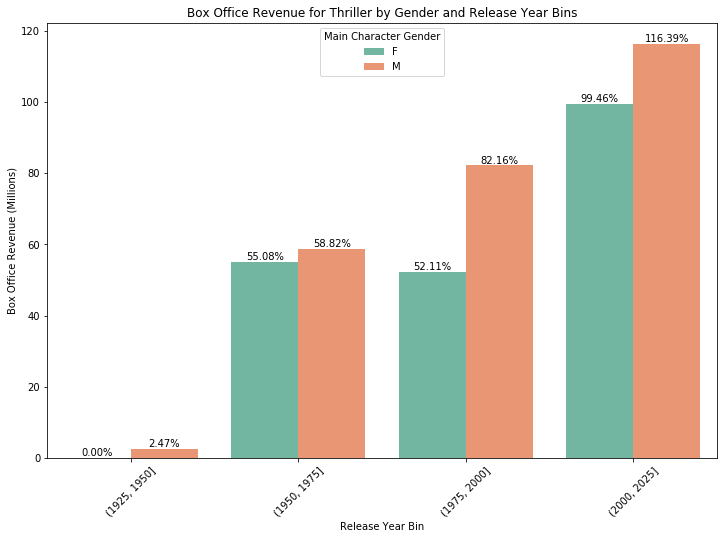

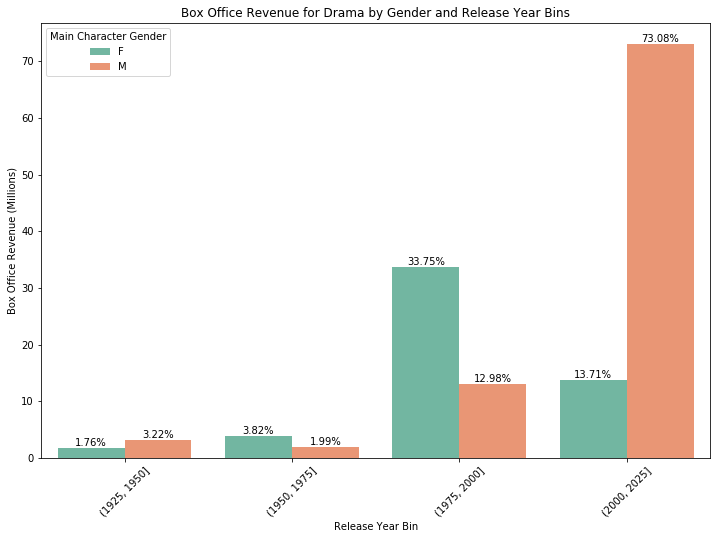

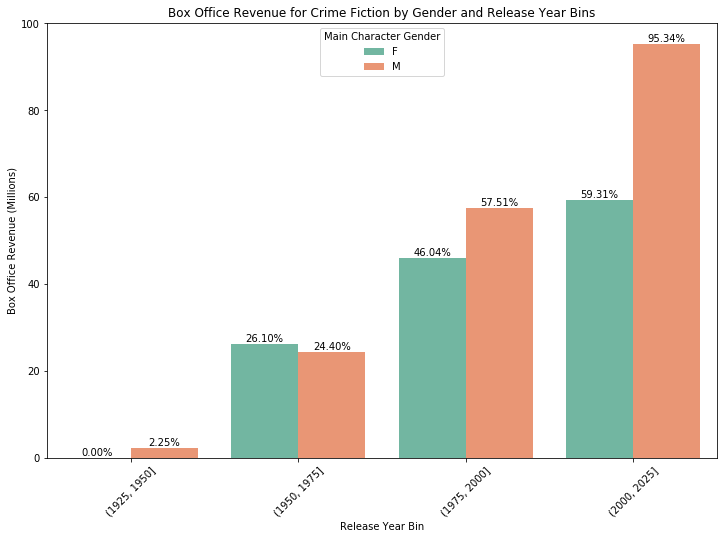

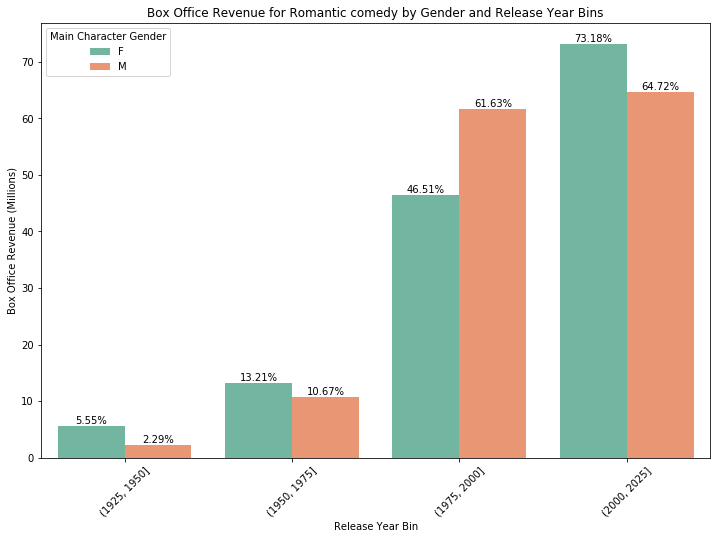

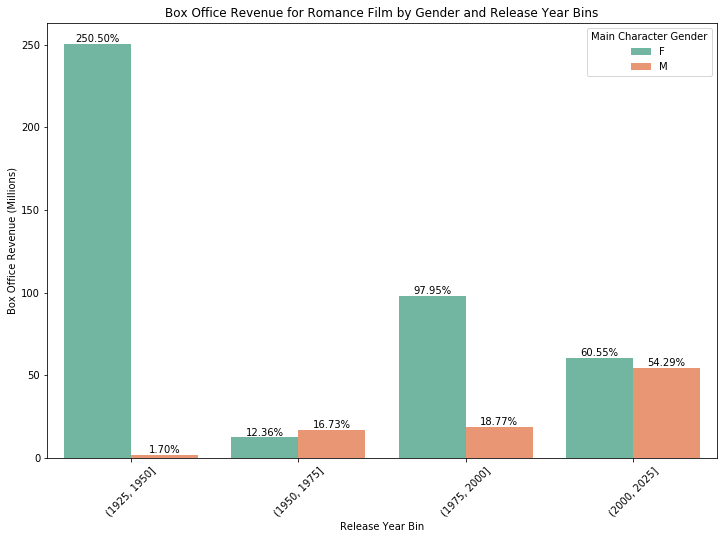

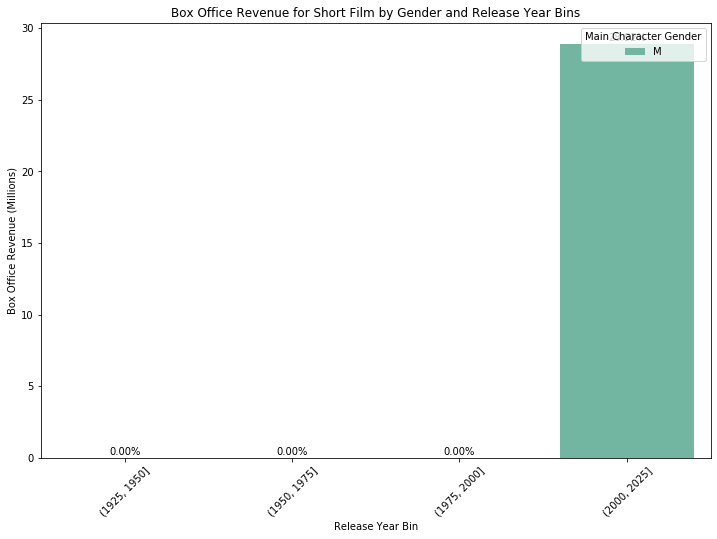

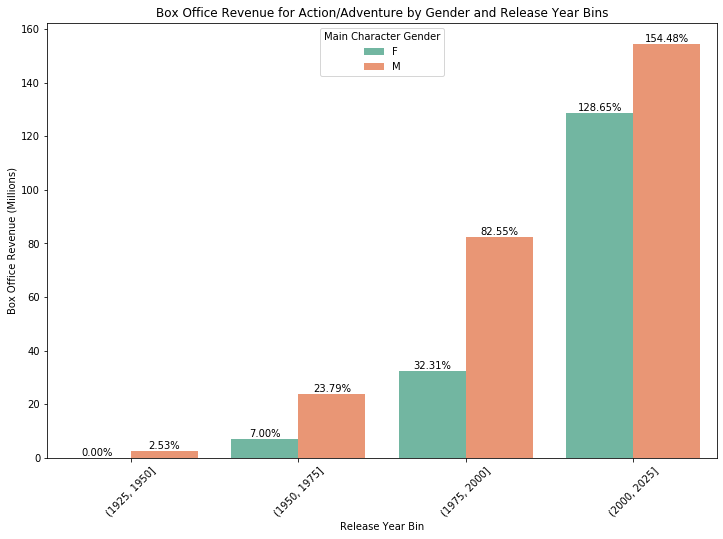

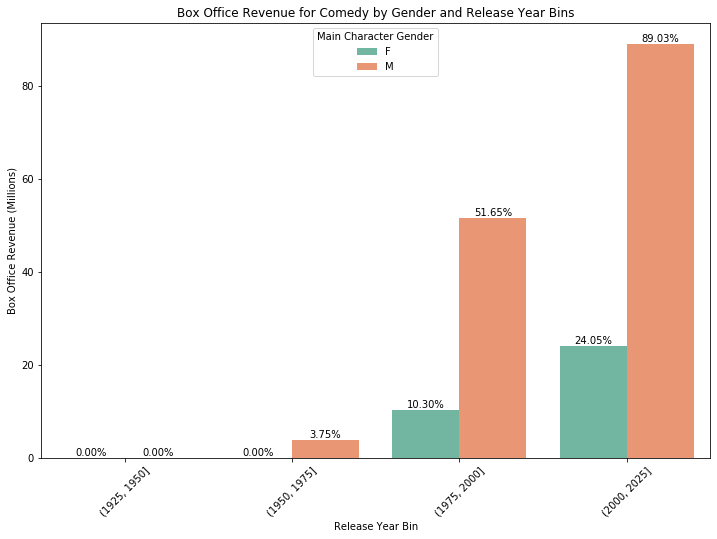

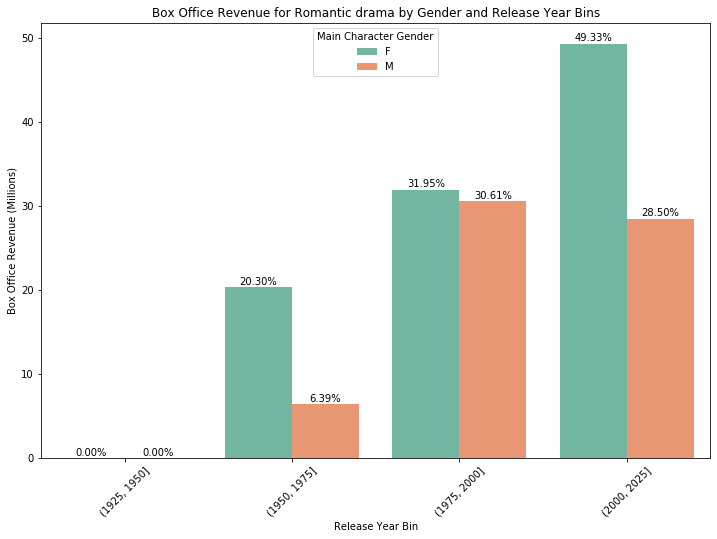

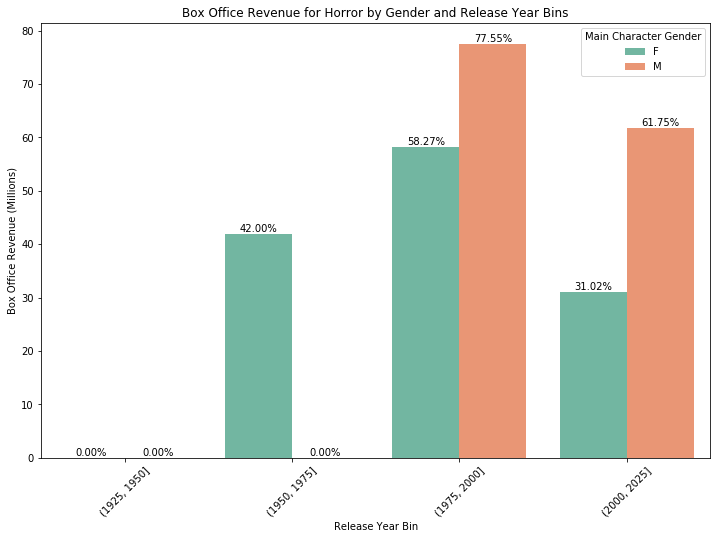

In [31]:
# Create bins for movie release years with a step of 25 years
bins = range(int(df_movie_gender_genre['Movie release year'].min()), int(df_movie_gender_genre['Movie release year'].max()) + 26, 25)

for genre in top_10_genres:
    # Filter data for the current genre
    genre_data = df_movie_gender_genre[df_movie_gender_genre['Movie genres'] == genre]

    # Create a new column 'Release Year Bin' based on the bins
    genre_data['Release Year Bin'] = pd.cut(genre_data['Movie release year'], bins)

    # Group by 'Main Character Gender' and 'Release Year Bin', calculate mean box office revenue
    grouped_data = genre_data.groupby(['Main Character Gender', 'Release Year Bin']).mean().reset_index()

    # Convert 'Box office revenue' to millions
    grouped_data['Movie box office revenue'] /= 1000000

    # Create a figure with one subplot
    plt.figure(figsize=(12, 8))

    # Bar plot
    sns.barplot(x='Release Year Bin', y='Movie box office revenue', hue='Main Character Gender', data=grouped_data, palette='Set2')
    plt.title(f'Box Office Revenue for {genre} by Gender and Release Year Bins')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.ylabel('Box Office Revenue (Millions)')

    # Add percentage text on top of bars
    for p in plt.gca().patches:
        height = p.get_height() if not pd.isna(p.get_height()) else 0
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.05, f"{height:.2f}%", ha='center', va='bottom')

    # Show the plot
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


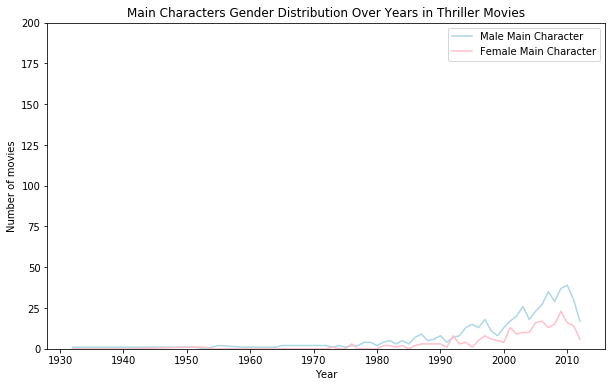

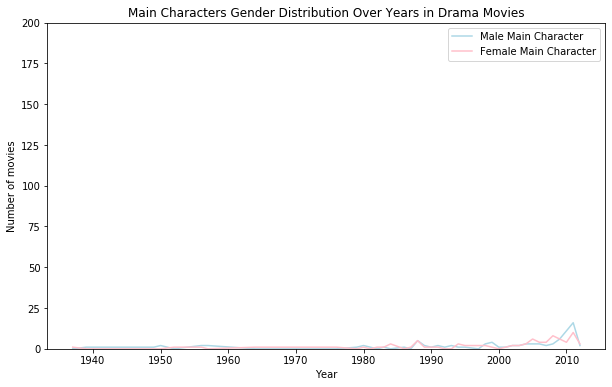

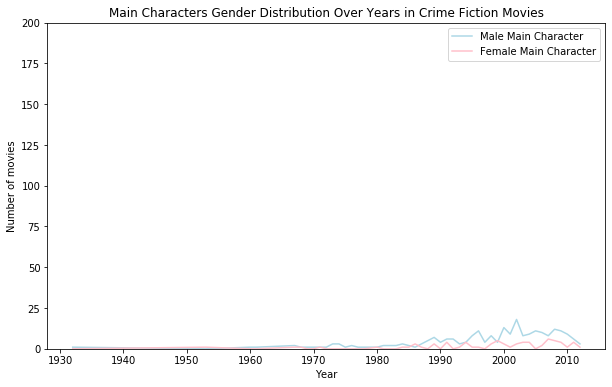

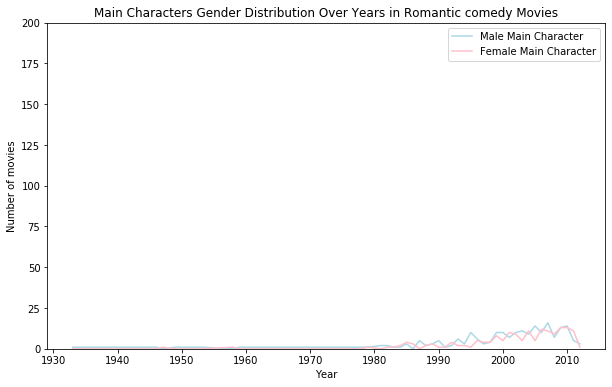

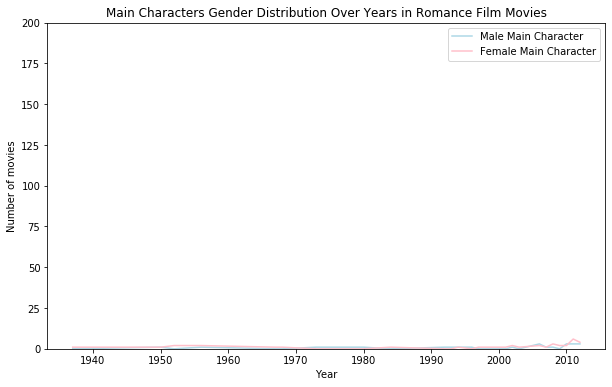

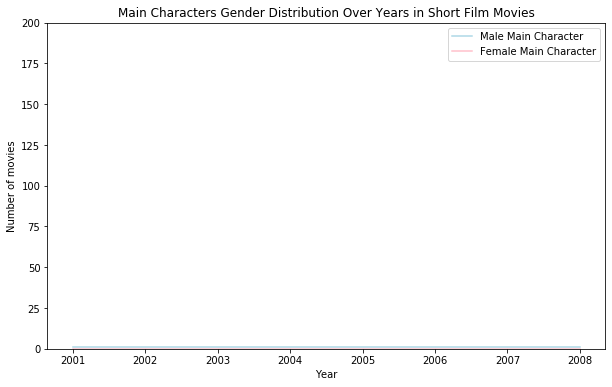

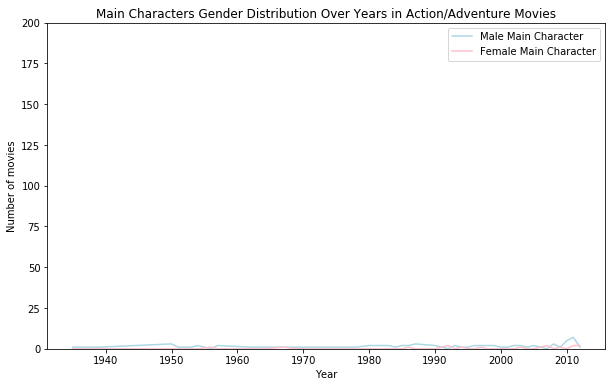

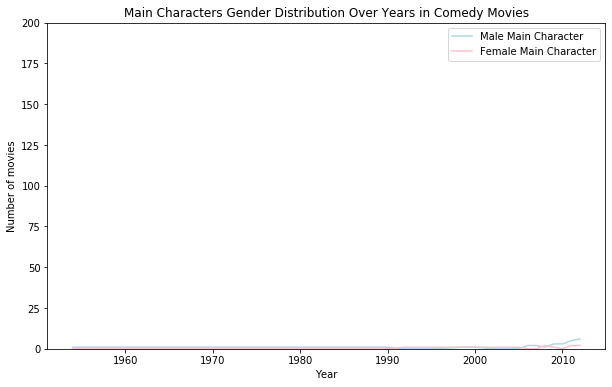

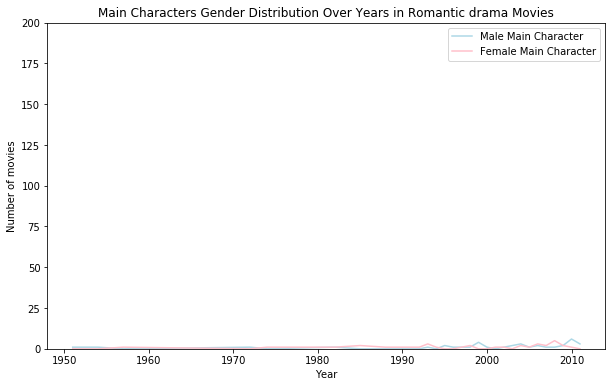

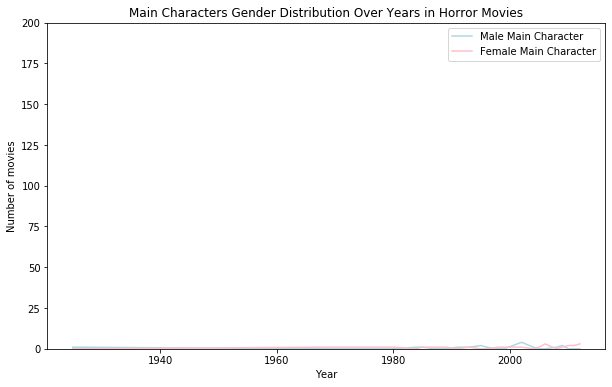

In [33]:
grouped_df = df_movie_gender_genre.groupby(['Movie genres', 'Movie release year', 'Main Character Gender']).size().unstack(fill_value=0)

# Plot data for each of the top genres
for genre in top_10_genres:
    genre_data = grouped_df.loc[genre]
    plt.figure(figsize=(10, 6))
    plt.plot(genre_data.index, genre_data['M'], label='Male Main Character', color='lightblue')
    plt.plot(genre_data.index, genre_data['F'], label='Female Main Character', color ='pink')
    plt.title(f"Main Characters Gender Distribution Over Years in {genre} Movies")
    plt.xlabel('Year')
    plt.ylabel('Number of movies')
    plt.ylim((0,200))
    plt.legend()
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


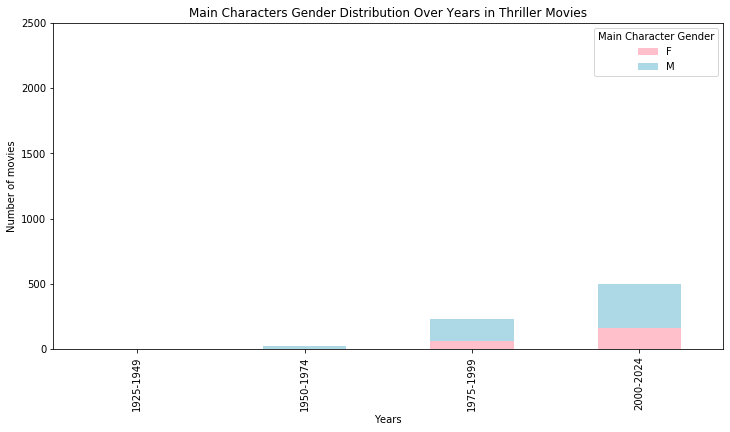

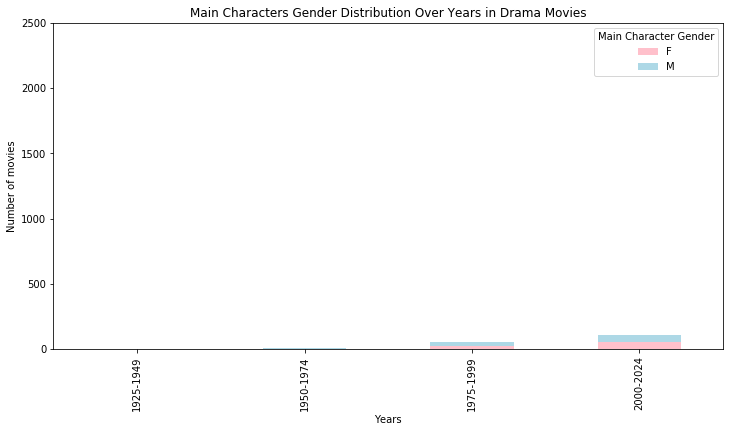

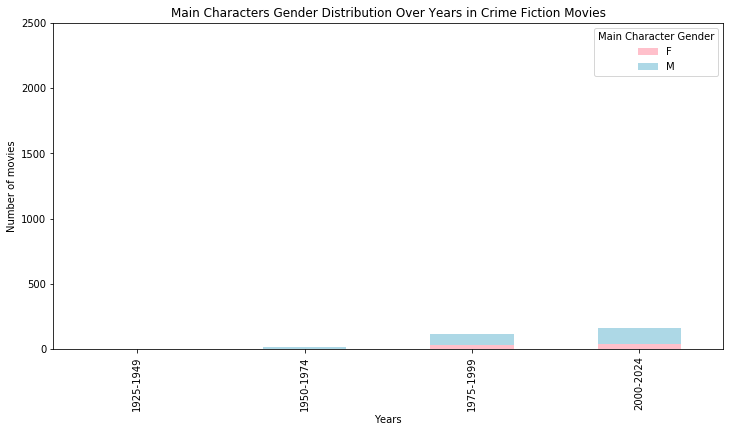

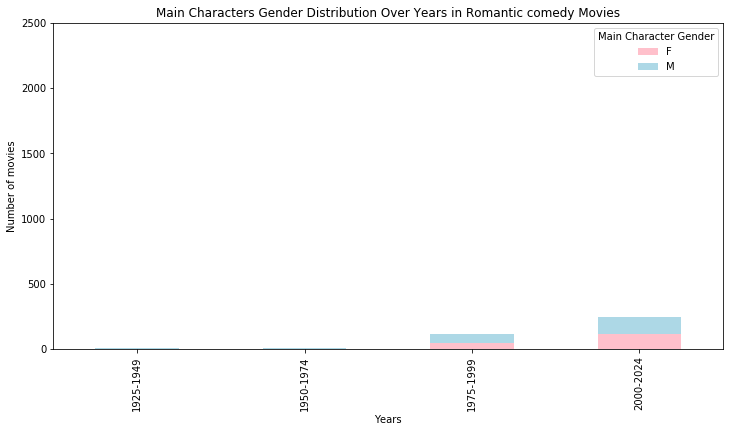

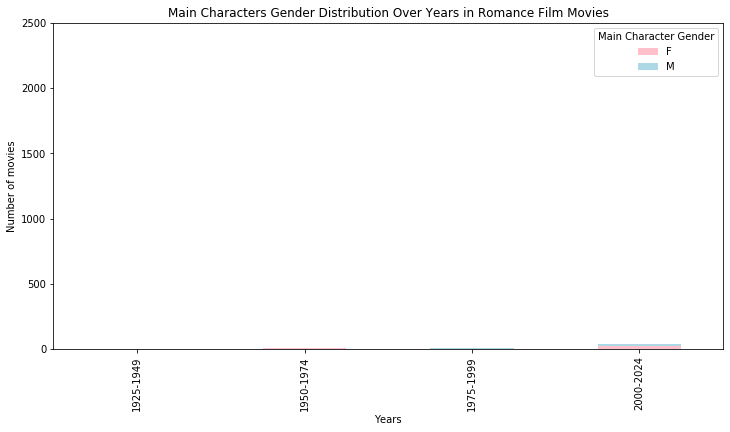

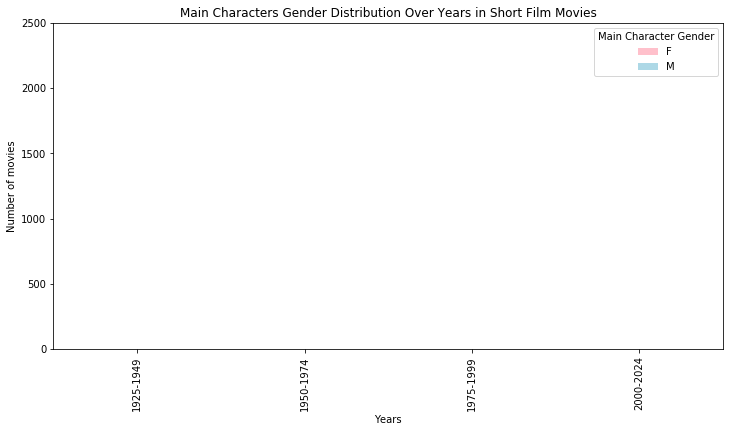

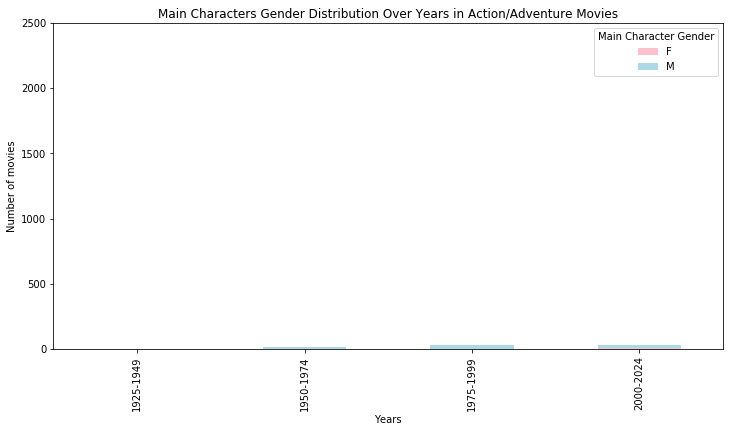

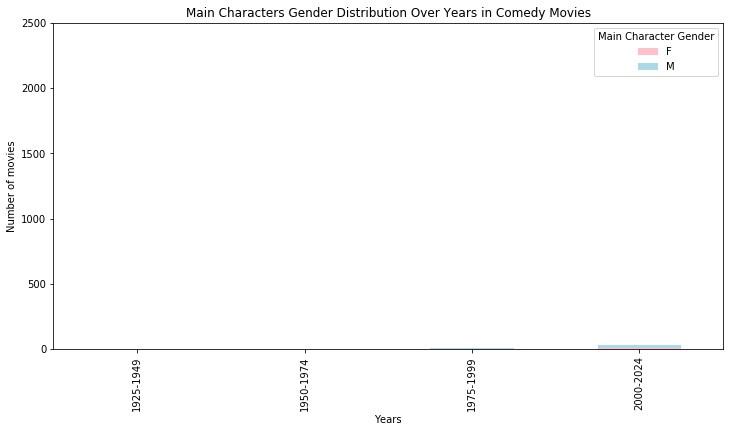

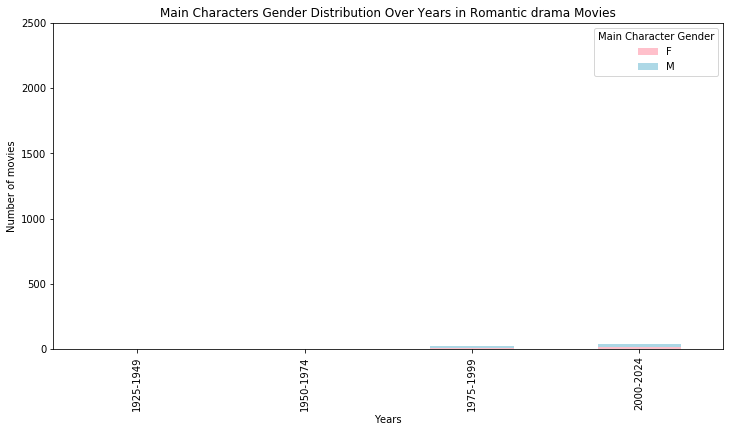

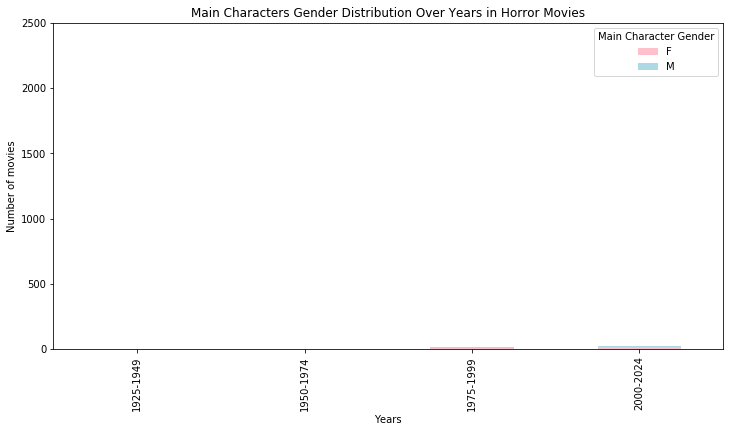

In [35]:
# Create year bins
bins = range(int(df_movie_gender_genre['Movie release year'].min()), 
             int(df_movie_gender_genre['Movie release year'].max()) + 25, 25)
labels = [f'{i}-{i+24}' for i in bins[:-1]]
df_movie_gender_genre['Year Bin'] = pd.cut(df_movie_gender_genre['Movie release year'], bins=bins, labels=labels, right=False)

# Group and aggregate data
grouped_df = df_movie_gender_genre.groupby(['Movie genres', 'Year Bin', 'Main Character Gender']).size().unstack(fill_value=0)

# Define colors for each gender
colors = {'F': 'pink', 'M': 'lightblue'}

# Plot data for each of the top genres with custom colors
for genre in top_10_genres:
    genre_data = grouped_df.loc[genre]
    genre_data.plot(kind='bar', stacked=True, color=[colors.get(x) for x in genre_data.columns], figsize=(12, 6))
    plt.title(f"Main Characters Gender Distribution Over Years in {genre} Movies")
    plt.xlabel('Years')
    plt.ylabel('Number of movies')
    plt.ylim((0, 2500))
    plt.legend(title='Main Character Gender')
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


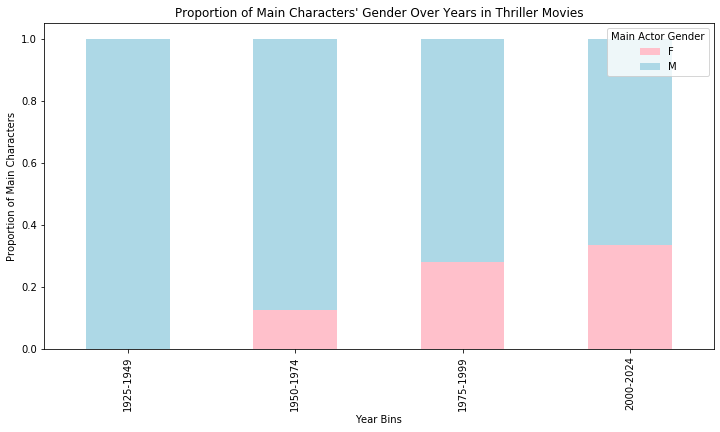

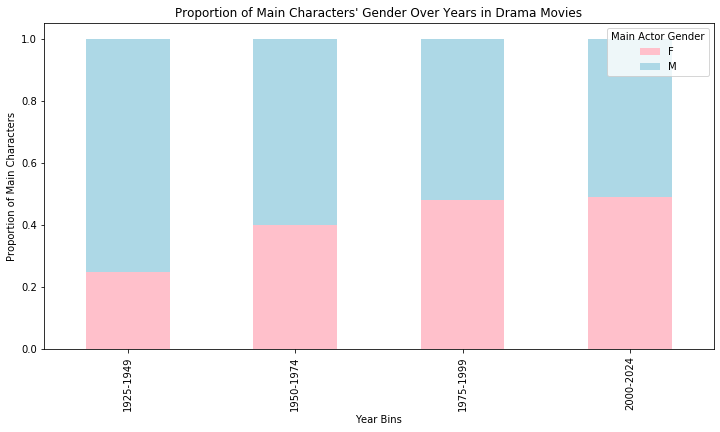

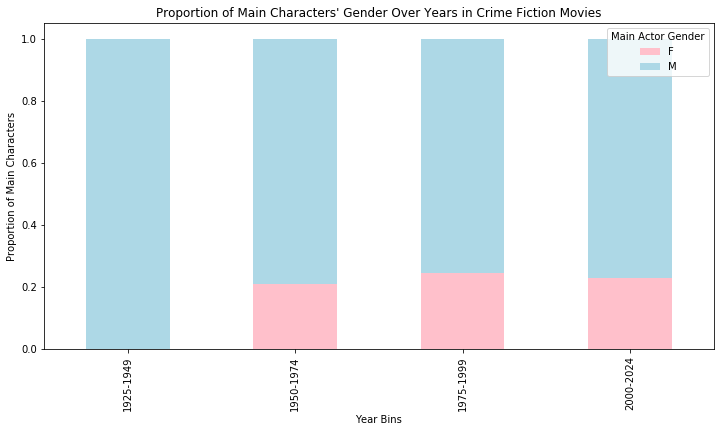

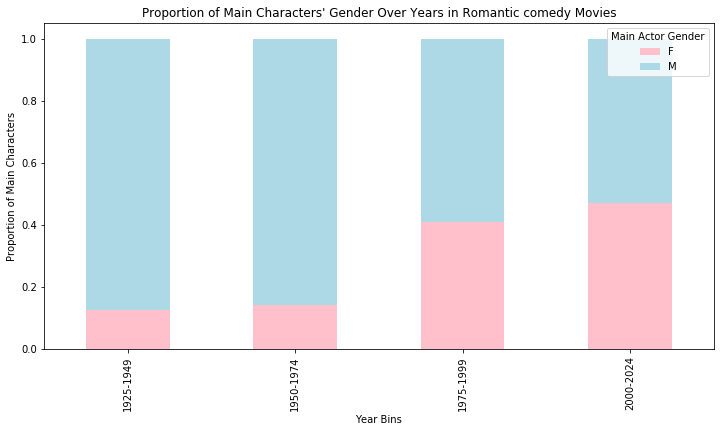

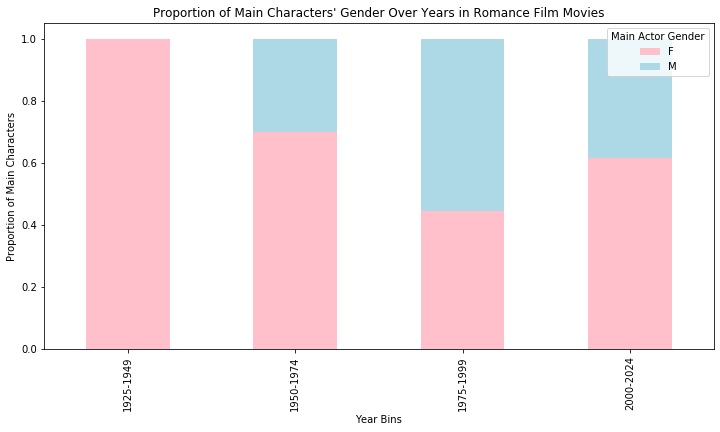

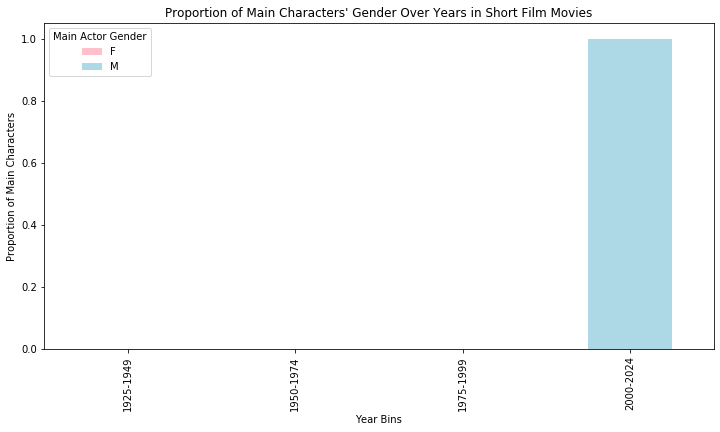

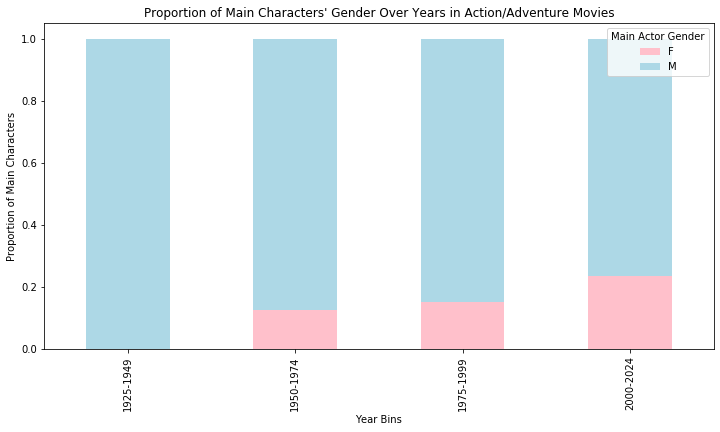

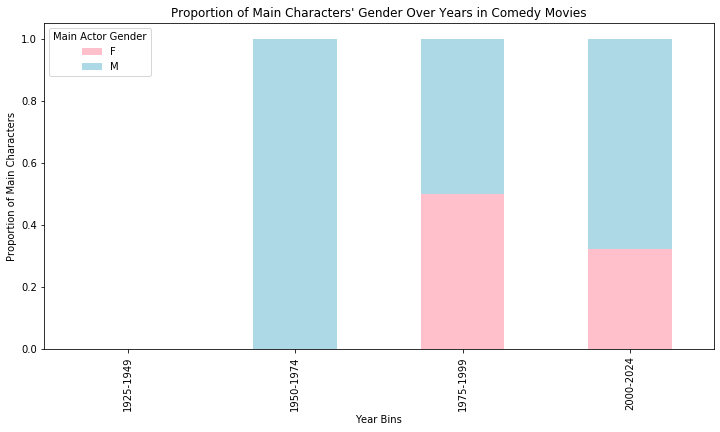

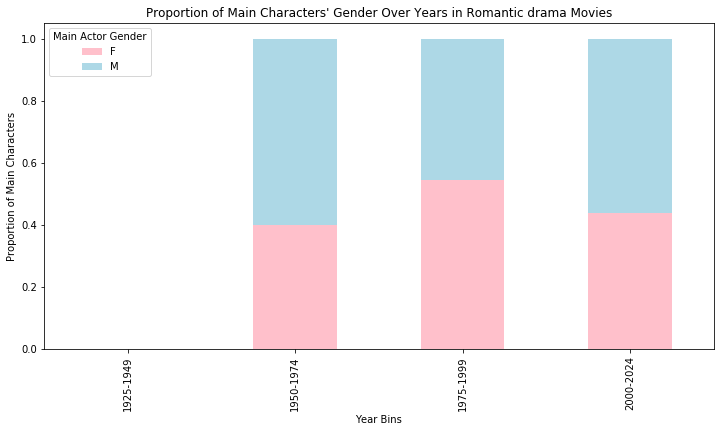

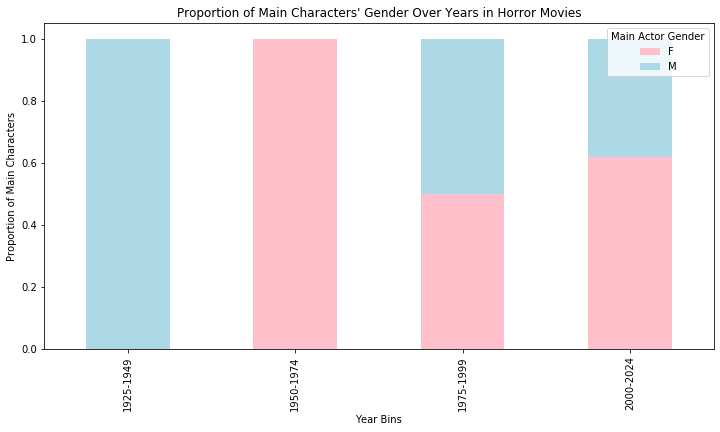

In [38]:
# Create year bins
bins = range(int(df_movie_gender_genre['Movie release year'].min()), 
             int(df_movie_gender_genre['Movie release year'].max()) + 25, 25)
labels = [f'{i}-{i+24}' for i in bins[:-1]]
df_movie_gender_genre['Year Bin'] = pd.cut(df_movie_gender_genre['Movie release year'], bins=bins, labels=labels, right=False)

# Group and aggregate data
grouped_df = df_movie_gender_genre.groupby(['Movie genres', 'Year Bin', 'Main Character Gender']).size()
# Calculate proportions
grouped_df = grouped_df.groupby(level=[0, 1]).apply(lambda x: x / float(x.sum())).unstack(fill_value=0)

# Plot data for each of the top genres
# Define colors for each gender
colors = {'F': 'pink', 'M': 'lightblue'}


for genre in top_10_genres:
    genre_data = grouped_df.loc[genre]
    genre_data.plot(kind='bar', stacked=True, color=[colors.get(x) for x in genre_data.columns], figsize=(12, 6))
    plt.title(f"Proportion of Main Characters' Gender Over Years in {genre} Movies")
    plt.xlabel('Year Bins')
    plt.ylabel('Proportion of Main Characters')
    plt.legend(title='Main Actor Gender')
    plt.show()


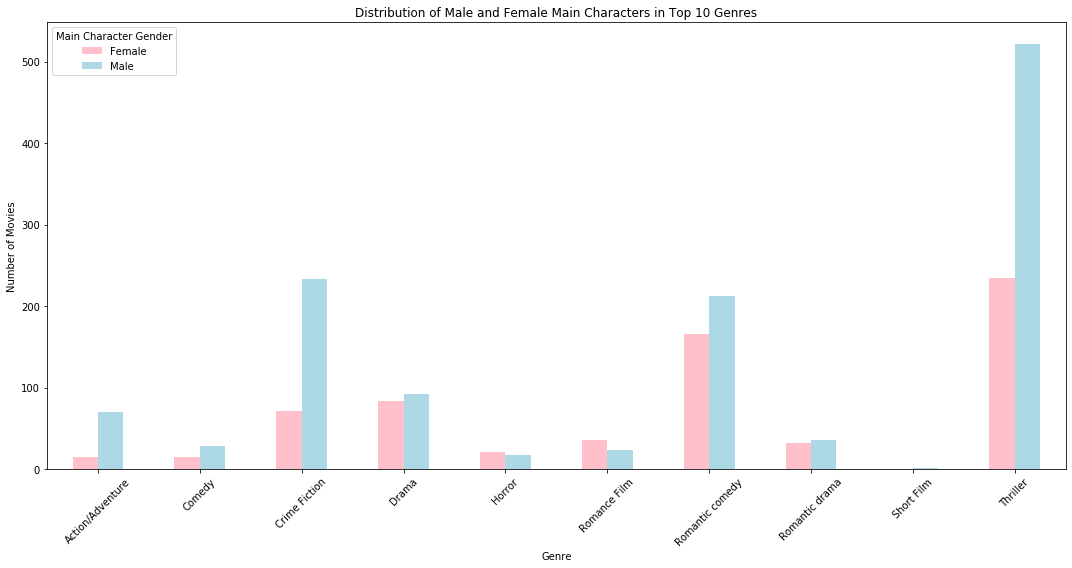

In [39]:
# Group by 'Genre' and 'Main Character Gender' and count
genre_gender_counts = df_movie_gender_genre.groupby(['Movie genres', 'Main Character Gender']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
genre_gender_counts.plot(kind='bar', ax=ax, color=['pink', 'lightblue'])
ax.set_title('Distribution of Male and Female Main Characters in Top 10 Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Movies')
ax.legend(title='Main Character Gender', labels=['Female', 'Male'])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

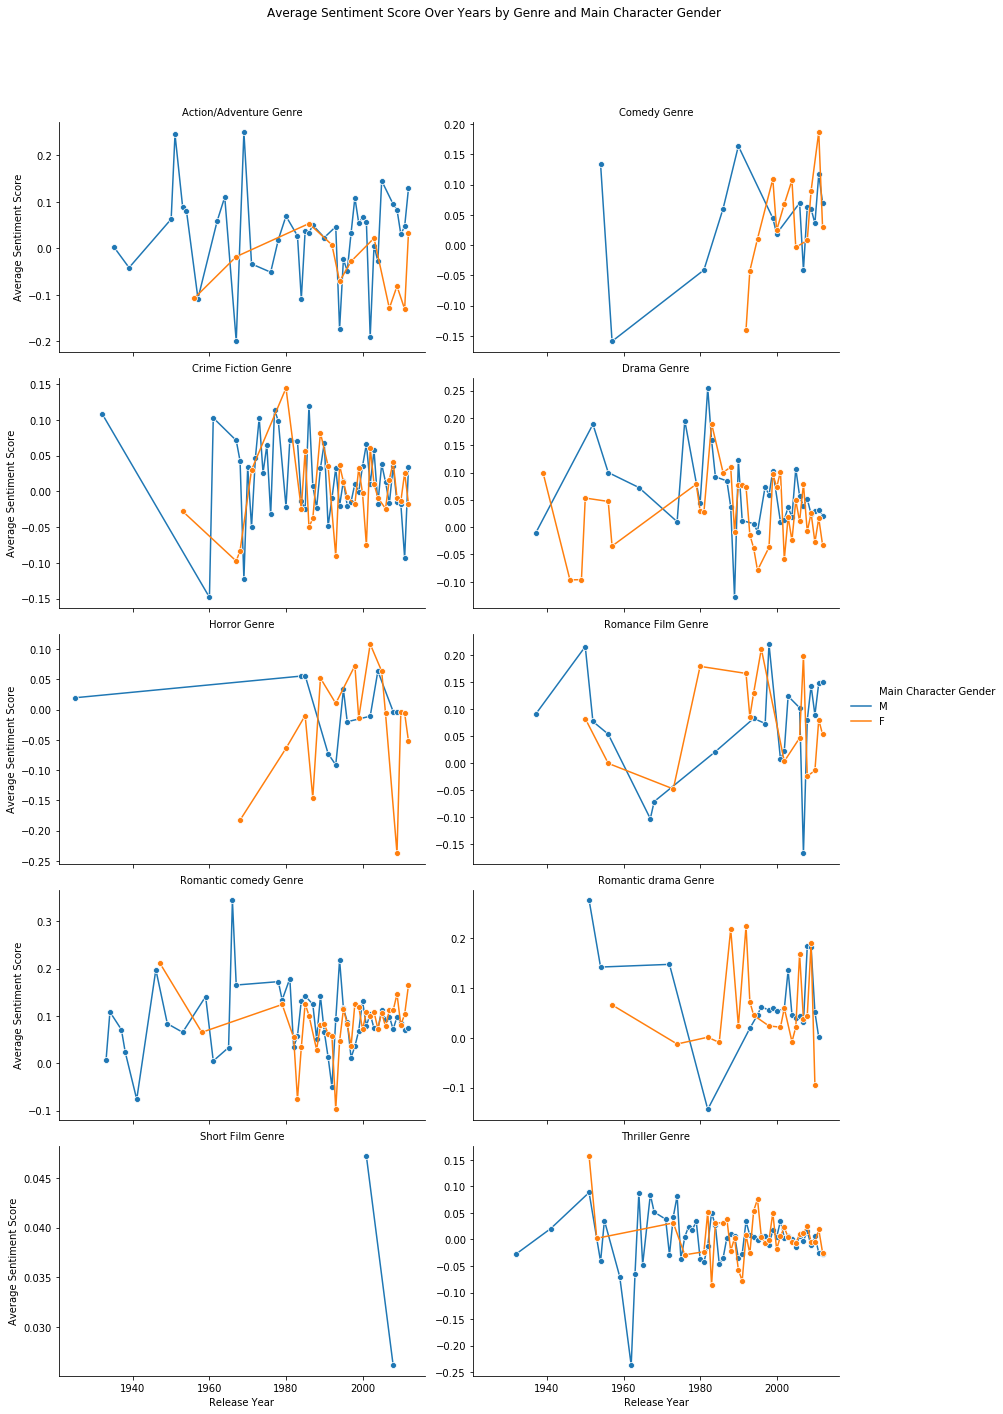

In [40]:
# Create a new DataFrame for the averages
avg_sentiment_df = df_movie_gender_genre.groupby(['Movie genres', 'Movie release year', 'Main Character Gender'])['Sentiment score plot'].mean().reset_index()

# Set the plot size
plt.figure(figsize=(20, 20))

# Use seaborn's FacetGrid to create small multiples
g = sns.FacetGrid(avg_sentiment_df, col='Movie genres', col_wrap=2, height=4, aspect=1.5, sharey=False)
g = g.map(sns.lineplot, 'Movie release year', 'Sentiment score plot', 'Main Character Gender', marker='o')

# Add titles and adjust aesthetics
g.add_legend()
g.set_titles(col_template="{col_name} Genre")
g.set_axis_labels("Release Year", "Average Sentiment Score")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Sentiment Score Over Years by Genre and Main Character Gender')

plt.show()